In [1]:
import numpy as np
import pandas as pd
import numpy.random as random
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [2]:
def mul_ten_and_mat(tensor, matrix):
    ten_shape = tensor.shape
    result = np.zeros((ten_shape[0], ten_shape[2]))
    for i in range(ten_shape[2]):
        result[:,i] = tensor[:,:,i].dot(matrix[:,i])
    return result

N = 2000
A = np.array([
    [
        [0.5, 0, 0],
        [0, 0.5, 0],
        [0, 0, 0.5]
    ],
    [
        [0, 0, 0],
        [0.4, 0, 0],
        [0, 0, 0]
    ],
    [
        [0, 0.5, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    ])

T = np.array([
        [1, -1, 1],
        [-1, 1, 1],
        [1, 1, -1]
    ])

tmp = np.array(
    [
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3)) + T * i**2 / 500000
data_tensor.shape

(2000, 3, 3)

In [3]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
1,0.162575,0.605994,0.737827,1.021400,-0.087095,-0.090002,0.558504,-0.692867,0.432978
2,0.692091,1.057551,0.935562,-0.441921,-0.992290,-0.067810,-0.079903,-0.013653,-0.561375
3,-0.010031,1.038164,0.153206,-0.308468,0.354418,-1.183383,0.530376,-0.990741,-0.187433
4,-0.103058,1.099703,0.561688,0.520904,-0.427862,-0.665915,-0.330515,-0.904476,-0.923413
...,...,...,...,...,...,...,...,...,...
1995,15.281045,-13.940672,7.312067,-4.653387,7.696065,6.144329,4.360087,7.555582,-8.859445
1996,14.891411,-13.215743,7.615824,-4.984341,8.937880,6.571198,3.949380,8.326484,-8.199387
1997,14.563590,-13.541575,8.163871,-2.548521,8.637408,5.389879,3.318411,7.248256,-8.051694
1998,14.759802,-12.546160,8.752149,-3.697920,7.862302,7.404224,4.901028,8.535053,-8.417202


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

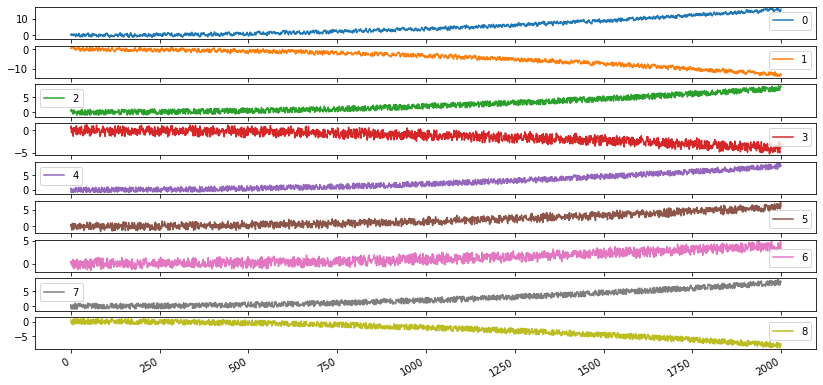

In [4]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [5]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [6]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [7]:
train_dct = jts.apply_dct_to_tensor(train_tensor)
train_dct

array([[[  3.        ,   0.        ,   0.        ],
        [  3.        ,   0.        ,   0.        ],
        [  3.        ,   0.        ,   0.        ]],

       [[  3.4849583 ,  -0.68576855,  -1.3217222 ],
        [ -0.34793555,   2.24969245,   0.08731582],
        [  2.16160605,   0.52801325,   1.35080818]],

       [[  0.34053469,   1.33713311,   1.49603057],
        [  0.10321557,   1.85538074,   3.02847926],
        [  0.61275411,   2.5927711 ,   0.50980736]],

       ...,

       [[ 23.91048506,  16.17908038,  23.59338876],
        [  2.98964119, -32.97018789, -15.96967104],
        [ 11.24092269,  20.49083355, -11.59972011]],

       [[ 26.40814555,  16.7068132 ,  25.54417873],
        [  6.56164725, -30.3621351 , -16.57133757],
        [  9.84678363,  21.19479514,  -9.61279266]],

       [[ 26.14659334,  17.66592028,  24.12447801],
        [  6.25604389, -30.18922865, -16.47060713],
        [  6.59932412,  23.68659825, -10.16803619]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

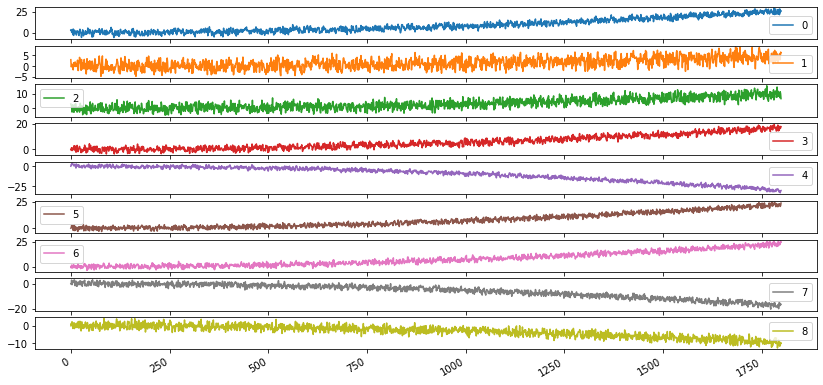

In [8]:
vectorized = pd.DataFrame(jts.tensor_to_vector(train_dct))
vectorized.plot(figsize = (14, 7), subplots = True)

In [9]:
train_model_sets = jts.split_cols_into_model_sets(train_dct, N_train)
test_model_sets = jts.split_cols_into_model_sets(test_tensor, N_test)

In [10]:
result_model_sets = np.empty((3, N_test, 3))

In [11]:
for i in range(3):
    train_df = pd.DataFrame(train_model_sets[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df.diff().dropna()
    test_df = pd.DataFrame(test_model_sets[i])
    model = VAR(train_diff)
    fit = model.fit(3)
    
    test_df.columns = test_df.columns[:].astype(str)
    results = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets[i] = jts.invert_diff_transformation(results, train_df)
result_model_sets

array([[[ 26.11774368,   5.98741268,   8.75875711],
        [ 25.7338053 ,   5.39026198,   9.34911021],
        [ 26.08345393,   5.8851971 ,   8.54769464],
        ...,
        [ 28.69951589,   6.38768726,   9.57553029],
        [ 28.71331603,   6.39059415,   9.58035795],
        [ 28.72711617,   6.39350104,   9.58518561]],

       [[ 17.90707161, -31.13864021,  21.92666533],
        [ 17.1121266 , -31.3729077 ,  21.96819127],
        [ 17.23608382, -30.84444515,  22.14159204],
        ...,
        [ 19.298629  , -34.6324602 ,  24.47852278],
        [ 19.30844283, -34.65109709,  24.49021274],
        [ 19.31825665, -34.66973398,  24.5019027 ]],

       [[ 24.03719332, -16.79492036, -10.31559389],
        [ 24.1225256 , -16.56635738, -10.6201581 ],
        [ 24.42267338, -16.55431965, -10.35689261],
        ...,
        [ 26.85569962, -18.47558059, -11.64371557],
        [ 26.86894871, -18.48516311, -11.65026059],
        [ 26.88219781, -18.49474563, -11.65680561]]])

In [12]:
result_dct_tensor = jts.collect_result_cols_into_tensor(result_model_sets, N_test)
result_dct_tensor

array([[[ 26.11774368,  17.90707161,  24.03719332],
        [  5.98741268, -31.13864021, -16.79492036],
        [  8.75875711,  21.92666533, -10.31559389]],

       [[ 25.7338053 ,  17.1121266 ,  24.1225256 ],
        [  5.39026198, -31.3729077 , -16.56635738],
        [  9.34911021,  21.96819127, -10.6201581 ]],

       [[ 26.08345393,  17.23608382,  24.42267338],
        [  5.8851971 , -30.84444515, -16.55431965],
        [  8.54769464,  22.14159204, -10.35689261]],

       ...,

       [[ 28.69951589,  19.298629  ,  26.85569962],
        [  6.38768726, -34.6324602 , -18.47558059],
        [  9.57553029,  24.47852278, -11.64371557]],

       [[ 28.71331603,  19.30844283,  26.86894871],
        [  6.39059415, -34.65109709, -18.48516311],
        [  9.58035795,  24.49021274, -11.65026059]],

       [[ 28.72711617,  19.31825665,  26.88219781],
        [  6.39350104, -34.66973398, -18.49474563],
        [  9.58518561,  24.5019027 , -11.65680561]]])

In [13]:
result_tensor = jts.apply_inverse_dct_to_tensor(result_dct_tensor)
result_tensor

array([[[ 13.52848247,  -3.65944049,   3.18982986],
        [-10.79020243,   6.5962089 ,   7.18769987],
        [  6.07021027,   4.89832415,  -6.58915586]],

       [[ 13.24923393,  -3.75187432,   3.36954303],
        [-10.91926092,   6.42049612,   7.19389578],
        [  6.12982926,   5.09823773,  -6.55351189]],

       [[ 13.3933167 ,  -3.7936488 ,   3.44205907],
        [-10.68221145,   6.49897273,   7.12583726],
        [  6.09019407,   4.87691331,  -6.69326006]],

       ...,

       [[ 14.83023691,  -4.16864722,   3.68816826],
        [-12.012179  ,   7.22314141,   7.98288122],
        [  6.72164331,   5.47716024,  -7.4110384 ]],

       [[ 14.83757812,  -4.17076357,   3.68984346],
        [-12.01867161,   7.22682006,   7.98714862],
        [  6.72473169,   5.48014652,  -7.41469923]],

       [[ 14.84491933,  -4.17287991,   3.69151866],
        [-12.02516422,   7.23049872,   7.99141602],
        [  6.72782006,   5.4831328 ,  -7.41836006]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

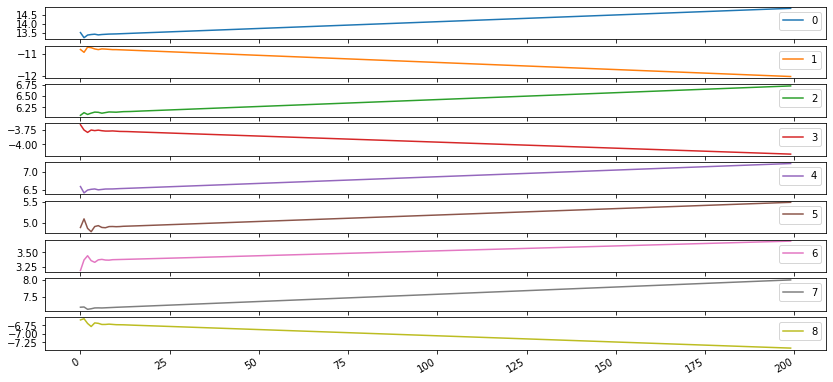

In [14]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

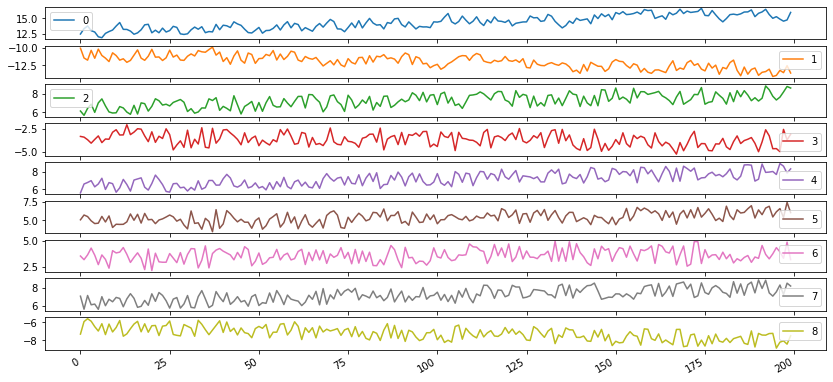

In [15]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [16]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "DCT"})
error

,DCT
0,0.0840447
1,0.0898884
2,0.0757608
3,0.0897775
4,0.0665823
...,...
195,0.103067
196,0.102435
197,0.120713
198,0.123818


<AxesSubplot:>

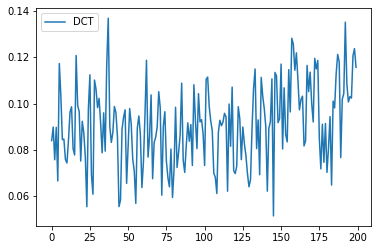

In [17]:
error.plot()

In [18]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       -0.240         0.644          0.659          4.518%        
1       0.596          0.816          0.746          6.024%        
2       -0.825         1.049          0.866          11.385%       
3       -0.301         0.542          0.602          18.893%       
4       -0.331         0.509          0.582          7.812%        
5       -0.206         0.493          0.574          10.613%       
6       -0.076         0.399          0.535          15.291%       
7       0.373          0.531          0.617          9.080%        
8       0.175          0.404          0.529          7.242%        
